In [ ]:
!pip install pandas matplotlib seaborn scikit-learn xgboost


In [ ]:
import json
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load JSON
with open('/content/user-wallet-transactions.json') as f:
    data = json.load(f)

data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[{'_id': {'$oid': '681d38fed63812d4655f571a'},
  'userWallet': '0x00000000001accfa9cef68cf5371a23025b6d4b6',
  'network': 'polygon',
  'protocol': 'aave_v2',
  'txHash': '0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190',
  'logId': '0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190_Deposit',
  'timestamp': 1629178166,
  'blockNumber': 1629178166,
  'action': 'deposit',
  'actionData': {'type': 'Deposit',
   'amount': '2000000000',
   'assetSymbol': 'USDC',
   'assetPriceUSD': '0.9938318274296357543568636362026045',
   'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174',
   'userId': '0x00000000001accfa9cef68cf5371a23025b6d4b6'},
  '__v': 0,
  'createdAt': {'$date': '2025-05-08T23:06:39.465Z'},
  'updatedAt': {'$date': '2025-05-08T23:06:39.465Z'}},
 {'_id': {'$oid': '681aa70dd6df53021cc6f3c0'},
  'userWallet': '0x000000000051d07a4fb3bd10121a343d85818da6',
  'network': 'polygon',
  'protocol': 'aave_v2',
  'txHash': '0xe6fc162c86b2928b0ba9b82bda6727

## Load the datasets

In [ ]:
# Assuming `data` is your loaded JSON object
df = pd.DataFrame(data)

In [ ]:
df

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,{'$oid': '681c85447b724ae36a6df5c9'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,1623421245,1623421245,repay,"{'type': 'Repay', 'amount': '19724448273', 'as...",0,{'$date': '2025-05-08T10:19:50.145Z'},{'$date': '2025-05-08T10:19:50.145Z'}
99996,{'$oid': '681c8d5b7b724ae36a70c446'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,1623558779,1623558779,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '200000...",0,{'$date': '2025-05-08T10:54:21.390Z'},{'$date': '2025-05-08T10:54:21.390Z'}
99997,{'$oid': '681c8d5b7b724ae36a70c62f'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,1623559191,1623559191,deposit,"{'type': 'Deposit', 'amount': '199401391185794...",0,{'$date': '2025-05-08T10:54:21.403Z'},{'$date': '2025-05-08T10:54:21.403Z'}
99998,{'$oid': '681c8d5b7b724ae36a70c752'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,1623559417,1623559417,borrow,"{'type': 'Borrow', 'amount': '4000000000', 'as...",0,{'$date': '2025-05-08T10:54:21.411Z'},{'$date': '2025-05-08T10:54:21.411Z'}


## Data preprocessing

In [ ]:
# Flatten nested fields in actionData
df['amount'] = df['actionData'].apply(lambda x: float(x['amount']))
df['assetSymbol'] = df['actionData'].apply(lambda x: x['assetSymbol'])
df['assetPriceUSD'] = df['actionData'].apply(lambda x: float(x['assetPriceUSD']))
df['usd_value'] = df['amount'] * df['assetPriceUSD']

# Convert timestamp fields
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['createdAt'] = pd.to_datetime(df['createdAt'].apply(lambda x: x['$date']))
df['updatedAt'] = pd.to_datetime(df['updatedAt'].apply(lambda x: x['$date']))

# Optionally flatten _id (Mongo-style)
df['_id'] = df['_id'].apply(lambda x: x['$oid'])

# Drop actionData column if flattened
df.drop(columns=['actionData'], inplace=True)

In [ ]:
df

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,__v,createdAt,updatedAt,amount,assetSymbol,assetPriceUSD,usd_value
0,681d38fed63812d4655f571a,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,0,2025-05-08 23:06:39.465000+00:00,2025-05-08 23:06:39.465000+00:00,2.000000e+09,USDC,0.993832,1.987664e+09
1,681aa70dd6df53021cc6f3c0,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,0,2025-05-07 00:19:26.159000+00:00,2025-05-07 00:19:26.159000+00:00,1.450000e+20,WMATIC,1.970307,2.856945e+20
2,681d04c2d63812d4654c733e,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,0,2025-05-08 19:23:47.877000+00:00,2025-05-08 19:23:47.877000+00:00,1.000000e+15,WMATIC,0.922377,9.223773e+14
3,681d133bd63812d46551b6ef,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,0,2025-05-08 20:25:33.141000+00:00,2025-05-08 20:25:33.141000+00:00,4.000000e+15,WMATIC,1.057483,4.229933e+15
4,681899e4ba49fc91cf2f4454,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,0,2025-05-05 10:58:45.934000+00:00,2025-05-05 10:58:45.934000+00:00,5.015480e+05,USDC,1.002130,5.026161e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,681c85447b724ae36a6df5c9,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,2021-06-11 14:20:45,1623421245,repay,0,2025-05-08 10:19:50.145000+00:00,2025-05-08 10:19:50.145000+00:00,1.972445e+10,USDT,1.002191,1.976766e+10
99996,681c8d5b7b724ae36a70c446,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,2021-06-13 04:32:59,1623558779,redeemunderlying,0,2025-05-08 10:54:21.390000+00:00,2025-05-08 10:54:21.390000+00:00,2.000000e+18,WETH,2342.039086,4.684078e+21
99997,681c8d5b7b724ae36a70c62f,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,2021-06-13 04:39:51,1623559191,deposit,0,2025-05-08 10:54:21.403000+00:00,2025-05-08 10:54:21.403000+00:00,1.994014e+18,WETH,2342.039086,4.670059e+21
99998,681c8d5b7b724ae36a70c752,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,2021-06-13 04:43:37,1623559417,borrow,0,2025-05-08 10:54:21.411000+00:00,2025-05-08 10:54:21.411000+00:00,4.000000e+09,USDC,1.001901,4.007604e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   _id            100000 non-null  object             
 1   userWallet     100000 non-null  object             
 2   network        100000 non-null  object             
 3   protocol       100000 non-null  object             
 4   txHash         100000 non-null  object             
 5   logId          100000 non-null  object             
 6   timestamp      100000 non-null  datetime64[ns]     
 7   blockNumber    100000 non-null  int64              
 8   action         100000 non-null  object             
 9   __v            100000 non-null  int64              
 10  createdAt      100000 non-null  datetime64[ns, UTC]
 11  updatedAt      100000 non-null  datetime64[ns, UTC]
 12  amount         100000 non-null  float64            
 13  assetSymbol    100000 non-null

In [ ]:
df.isnull().sum()

,0
_id,0
userWallet,0
network,0
protocol,0
txHash,0
logId,0
timestamp,0
blockNumber,0
action,0
__v,0


### EDA

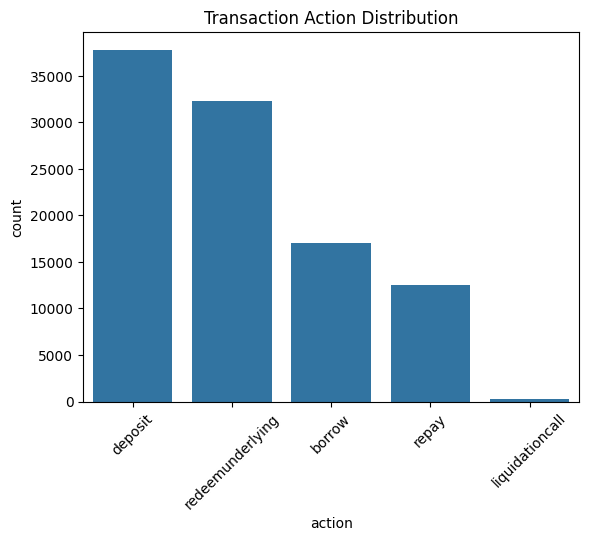

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='action', data=df)
plt.title("Transaction Action Distribution")
plt.xticks(rotation=45)

plt.show()


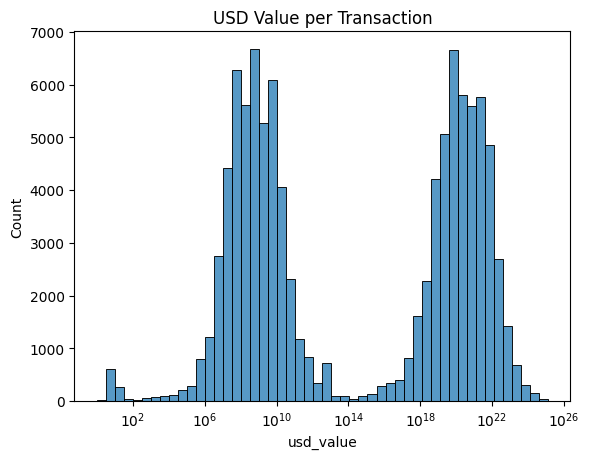

In [ ]:
sns.histplot(df['usd_value'], bins=50, log_scale=True)
plt.title("USD Value per Transaction")
plt.show()

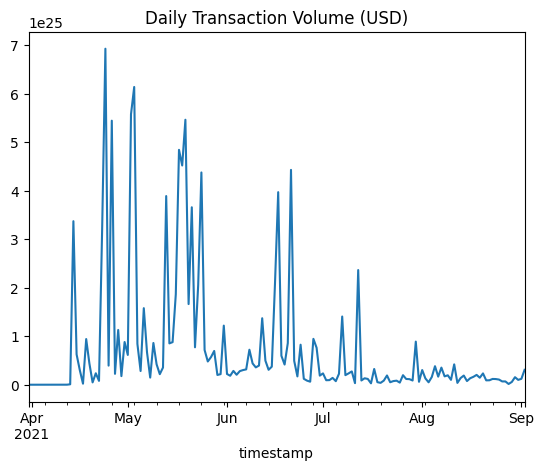

In [ ]:
df.set_index('timestamp').resample('D')['usd_value'].sum().plot(title="Daily Transaction Volume (USD)")
plt.show()

## Feature engineering


Engineer features from the transaction data to capture wallet behavior.


**Reasoning**:
I will group the dataframe by userWallet and calculate the total number of transactions, total USD value, average and standard deviation of USD value, first and last transaction timestamps, and number of active days.



In [ ]:
wallet_features = df.groupby('userWallet').agg(
    total_txn=('txHash', 'count'),
    total_usd=('usd_value', 'sum'),
    mean_txn_usd=('usd_value', 'mean'),
    std_txn_usd=('usd_value', 'std'),
    first_tx=('timestamp', 'min'),
    last_tx=('timestamp', 'max')
)

wallet_features['active_days'] = (wallet_features['last_tx'] - wallet_features['first_tx']).dt.days + 1
wallet_features['tx_per_day'] = wallet_features['total_txn'] / wallet_features['active_days']
wallet_features.loc[wallet_features['active_days'] == 1, 'tx_per_day'] = wallet_features['total_txn']

**Reasoning**:
I will pivot the original DataFrame to count the occurrences of each transaction action for each wallet and then merge this with the `wallet_features` DataFrame, filling missing values with 0.



In [ ]:
action_counts = df.pivot_table(index='userWallet', columns='action', values='txHash', aggfunc='count', fill_value=0)
wallet_features = wallet_features.merge(action_counts, left_index=True, right_index=True, how='left').fillna(0)

**Reasoning**:
I will calculate the ratio of each action type to the total number of transactions and then calculate the credit score based on the total USD value using a logarithmic transformation and scaling.



In [ ]:
# Calculate action ratios
for action in ['deposit', 'borrow', 'liquidationcall', 'redeemunderlying', 'repay']:
    if action in wallet_features.columns:
        wallet_features[f'{action}_ratio'] = wallet_features[action] / wallet_features['total_txn']
    else:
        wallet_features[f'{action}_ratio'] = 0

# Calculate credit score based on total_usd with log scaling
wallet_features['log_total_usd'] = np.log10(wallet_features['total_usd'] + 1)
min_log_usd = wallet_features['log_total_usd'].min()
max_log_usd = wallet_features['log_total_usd'].max()
wallet_features['credit_score'] = ((wallet_features['log_total_usd'] - min_log_usd) / (max_log_usd - min_log_usd)) * 1000

## Prepare data for modeling
Select features, split the data into training and testing sets, and scale the features.


**Reasoning**:
Select the features and the target variable, then split the data into training and testing sets, and finally scale the features for model training.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target (y)
features = ['log_total_usd', 'tx_per_day', 'total_txn'] + [col for col in wallet_features.columns if col.endswith('_ratio')]
X = wallet_features[features]
y = wallet_features['credit_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train and evaluate multiple models



**Reasoning**:
Import necessary libraries and train and evaluate the models.



In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Initialize results dictionary
results = {}

# Iterate through models, train, evaluate, and store results
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

Training Random Forest...
Random Forest - MSE: 0.3850, R2: 1.0000
Training Gradient Boosting...
Gradient Boosting - MSE: 1.8942, R2: 1.0000
Training XGBoost...
XGBoost - MSE: 18.1968, R2: 0.9997
Training Support Vector Regressor...
Support Vector Regressor - MSE: 9106.6360, R2: 0.8457


## Compare model performance



**Reasoning**:
Create a DataFrame from the results dictionary, sort it by R2 score, and then print the DataFrame and identify the best performing model based on the results.



In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE', 'R2'])
results_df = results_df.sort_values(by='R2', ascending=False)
display(results_df)

best_model_name = results_df.index[0]
best_r2 = results_df['R2'].iloc[0]
best_mse = results_df['MSE'].iloc[0]

print(f"\nThe best performing model is {best_model_name} with an R2 score of {best_r2:.4f} and an MSE of {best_mse:.4f}.")
print("This model performed best because it has the highest R2 score and the lowest MSE among the evaluated models.")

,MSE,R2
Random Forest,0.384969,0.999993
Gradient Boosting,1.894173,0.999968
XGBoost,18.196761,0.999692
Support Vector Regressor,9106.636045,0.845722



The best performing model is Random Forest with an R2 score of 1.0000 and an MSE of 0.3850.
This model performed best because it has the highest R2 score and the lowest MSE among the evaluated models.


## Predict and export scores



**Reasoning**:
Train the best model on the entire dataset, predict scores, create a new DataFrame with wallet and predicted score, and export to CSV.



In [ ]:
# Train the best performing model (RandomForestRegressor) on the entire dataset
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)

# Use the trained model to predict the credit scores for all wallets
wallet_features['predicted_credit_score'] = best_model.predict(X)

# Create a new DataFrame with wallet address and predicted score
wallet_scores = wallet_features[['predicted_credit_score']].copy()
wallet_scores = wallet_scores.reset_index().rename(columns={'index': 'userWallet'})

# Export to CSV
wallet_scores.to_csv('wallet_credit_scores.csv', index=False)

## Summary:

### Data Analysis Key Findings

*   Feature engineering successfully created features such as total transactions, total USD value, temporal features (active days, transactions per day), and counts/ratios of different transaction actions (deposit, borrow, liquidationcall, redeemunderlying, repay).
*   An initial credit score was calculated based on the log10 scaled total USD value, ranging from 0 to 1000.
*   The data was split into training and testing sets with a 80/20 ratio, and features were scaled using `StandardScaler`.
*   Four regression models (Random Forest, Gradient Boosting, XGBoost, and Support Vector Regressor) were trained and evaluated.
*   Random Forest Regressor demonstrated the best performance with the highest R2 score (close to 1) and lowest MSE among the evaluated models. Gradient Boosting and XGBoost also performed well, while SVR's performance was significantly lower.
*   The best-performing model (Random Forest Regressor) was retrained on the entire dataset and used to predict credit scores for all wallets.
*   A CSV file named `wallet_credit_scores.csv` was generated containing wallet addresses and their predicted credit scores.
*   A README section explaining the credit score logic (based on log-scaled total USD value and refined by the Random Forest model), the chosen model, key features, and the output file was created.




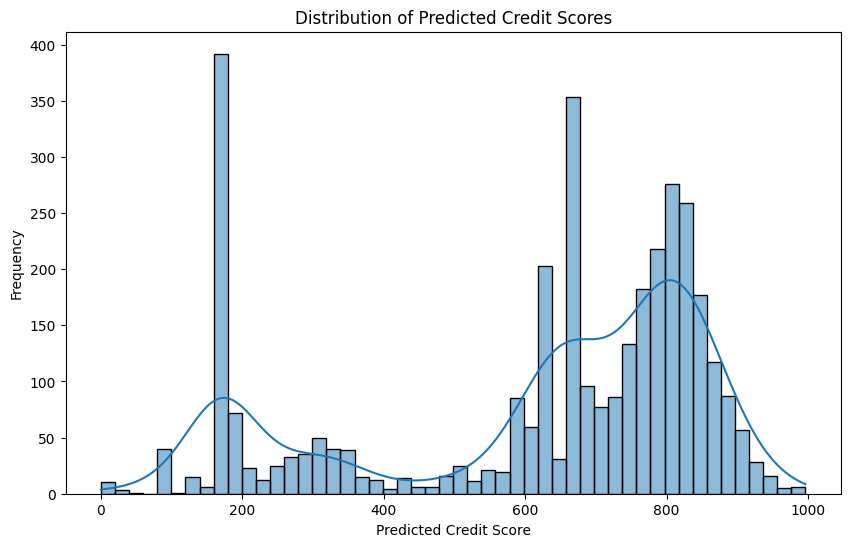

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wallet_credit_scores.csv file
wallet_scores = pd.read_csv('wallet_credit_scores.csv')

# Plot the distribution of predicted credit scores
plt.figure(figsize=(10, 6))
sns.histplot(wallet_scores['predicted_credit_score'], bins=50, kde=True)
plt.title('Distribution of Predicted Credit Scores')
plt.xlabel('Predicted Credit Score')
plt.ylabel('Frequency')
plt.show()